In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
100% 1.51G/1.52G [00:24<00:00, 107MB/s]
100% 1.52G/1.52G [00:24<00:00, 66.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
batch_size = 32
img_height = 224
img_width = 224

In [60]:
data_dir = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Ensures the same validation split
)

test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_ds = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    seed=123
)

validation_ds = test_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    seed=123
)

Found 9959 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [43]:
# #Normalize

# def process(image, label):
#   image = tf.cast(image/255. ,tf.float32)
#   return image, label

# train_ds = train_df.map(process)
# validation_ds = val_df.map(process)

In [61]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  pooling='max',
                  classes=4,
                  input_shape=(224,224, 3))

In [62]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_3               │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
conv_base.trainable = False

In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
model.summary()

ValueError: Undefined shapes are not supported.

In [66]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 185s 573ms/step - accuracy: 0.6414 - loss: 0.9612 - val_accuracy: 0.6546 - val_loss: 1.3837
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 512ms/step - accuracy: 0.8053 - loss: 0.5266 - val_accuracy: 0.5513 - val_loss: 1.3145
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 513ms/step - accuracy: 0.8347 - loss: 0.4428 - val_accuracy: 0.5971 - val_loss: 1.2302
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 166s 520ms/step - accuracy: 0.8227 - loss: 0.4611 - val_accuracy: 0.5629 - val_loss: 1.3824
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 199s 515ms/step - accuracy: 0.8382 - loss: 0.4336 - val_accuracy: 0.5545 - val_loss: 1.2999
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 512ms/step - accuracy: 0.8493 - loss: 0.4117 - val_accuracy: 0.6289 - val_loss: 1.5165
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 513ms/step - accuracy: 0.8506 - loss: 0.3916 - val_accuracy: 0.5891 - val_loss: 1.1121
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 164s 517ms/step - accuracy: 0.8405 - loss: 0.43

In [51]:
model.save('vgg_model.h5')
from google.colab import files

# Download the model to your local machine
# files.download('vgg_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

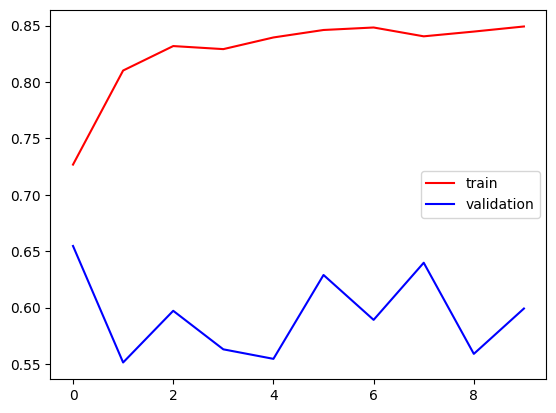

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

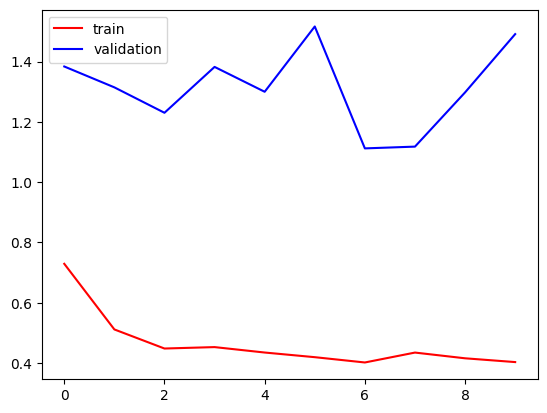

In [68]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [69]:
#
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
val_preds = np.argmax(model.predict(validation_ds), axis=-1)

# Get true labels
val_labels = np.concatenate([y for x, y in validation_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(val_labels, val_preds)
print(cm)

# Classification report
cr = classification_report(val_labels, val_preds)
print(cr)

78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step


KeyboardInterrupt: 

In [ ]:
#Do data augumentation and try again

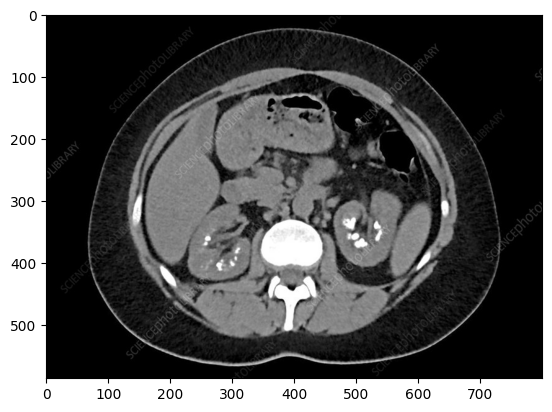

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1


In [70]:
import cv2
img = cv2.imread('/content/stone3.jpeg')
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224, 224))
test_input = img.reshape((1,224,224,3))
yhat = model.predict(test_input)
max_index = np.argmax(yhat)
print(max_index)

In [ ]:
# Now with ResNet50

In [ ]:
from keras.applications import Res